<a href="https://colab.research.google.com/github/Rmkh77/Sales-Prediction/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sales=pd.read_csv('/content/drive/MyDrive/project_hbic/oasis/sales/Advertising.csv')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
sales=sales.drop(columns=['Unnamed: 0'],axis=1)

In [12]:
col=['TV','Radio','Newspaper','Sales']

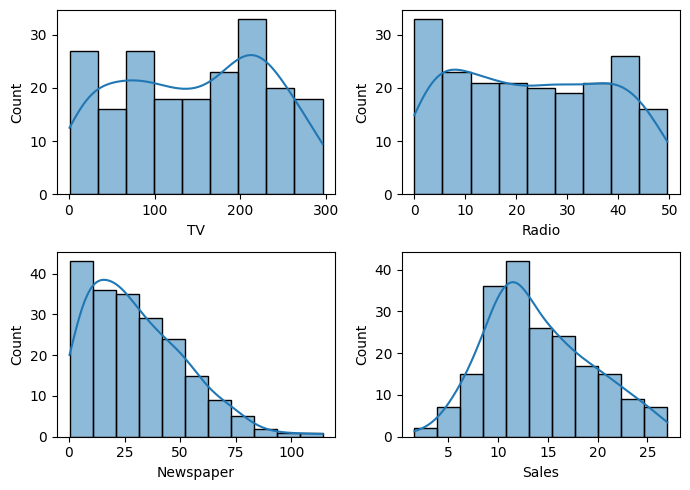

In [15]:
plt.figure(figsize=(7,5))
for i in col:
    plt.subplot(2,2, col.index(i) + 1)
    sns.histplot(sales[i],kde=True)
plt.tight_layout()

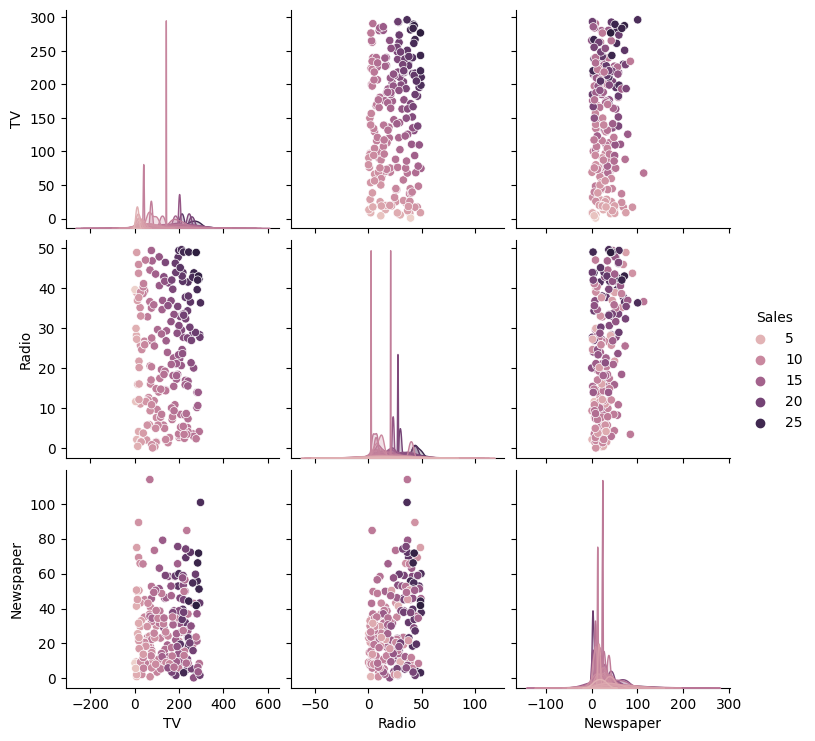

In [19]:
sns.pairplot(sales, hue='Sales')

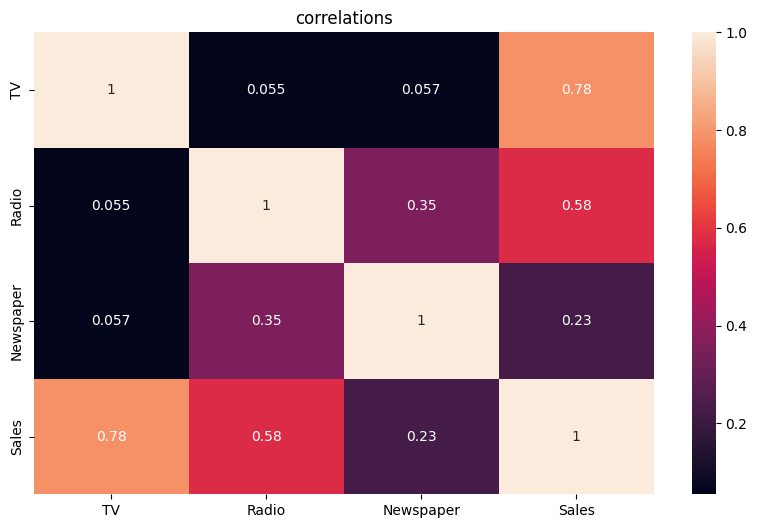

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(sales.corr(),annot=True)
plt.title("correlations")
plt.show()


<Axes: ylabel='Newspaper'>

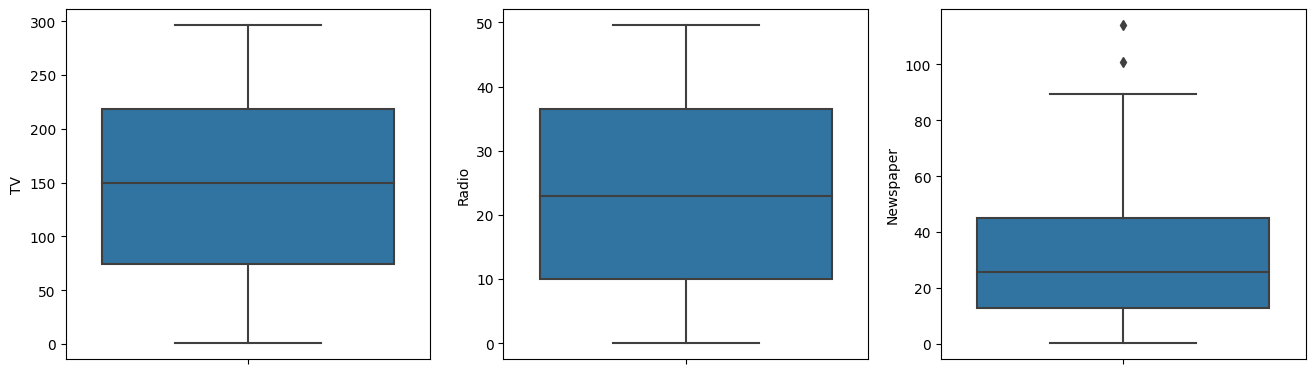

In [20]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=sales, y='TV')

plt.subplot(2, 3, 2)
sns.boxplot(data=sales, y='Radio')

plt.subplot(2, 3, 3)
sns.boxplot(data=sales, y='Newspaper')

In [22]:
sales= sales[sales['Newspaper'] <= 95]

In [27]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error,r2_score

In [43]:
X=sales.drop(columns=['Sales'])
y=sales['Sales']
alg_names=[]
alg_val=[]

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [45]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
alg_names.append('LinearRegression')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
alg_val.append(r2)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 4.18
Root Mean Squared Error: 2.04
R-squared: 0.88


In [46]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
alg_names.append('DecisionTreeRegressor')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
alg_val.append(r2)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.39
Root Mean Squared Error: 1.18
R-squared: 0.96


In [47]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
alg_names.append('RandomForestRegressor')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
alg_val.append(r2)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.81
Root Mean Squared Error: 0.90
R-squared: 0.98


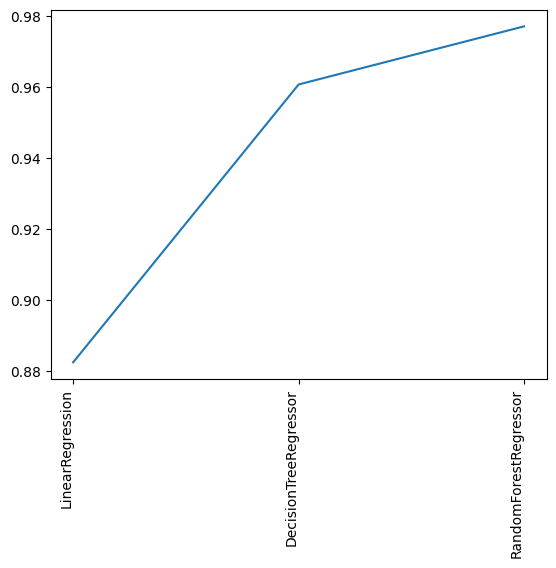

In [48]:
plt.plot(alg_names,alg_val)
plt.xticks(rotation=90,ha='right')
plt.show()

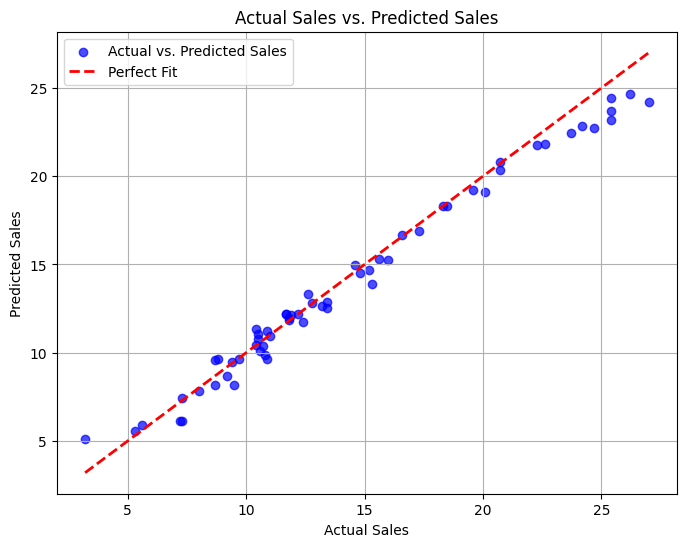

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
new_predictions = model.predict([[200,20,10]])
print("Predictions for New Data:")
print(new_predictions)

Predictions for New Data:
[15.898]
